# 📑 CRISP DM

## · Business Understanding
## · Data Understanding
## · Data Preparation
## · Modeling
## · Evaluation
## · Deployment

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [553]:
#Let's import data frame
df = pd.read_csv('credit_risk - credit_risk.csv')
df

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
0,23,70000,RENT,3.0,EDUCATION,A,12000,7.90,0,0.17,N,2
1,25,25000,RENT,0.0,MEDICAL,C,8500,12.53,1,0.34,Y,2
2,24,67000,MORTGAGE,2.0,HOMEIMPROVEMENT,B,12150,10.37,0,0.18,N,3
3,23,69000,RENT,7.0,MEDICAL,A,6000,7.88,0,0.09,N,2
4,30,33000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,6000,8.49,0,0.18,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32,58800,OWN,16.0,PERSONAL,C,7000,13.99,0,0.12,N,7
32577,33,30000,RENT,2.0,VENTURE,E,6000,19.42,1,0.20,N,10
32578,39,18300,RENT,0.0,DEBTCONSOLIDATION,D,1200,14.74,1,0.07,Y,11
32579,28,36000,MORTGAGE,NaN,VENTURE,D,6000,15.21,0,0.17,N,7


# 📍 Business Understanding

In [388]:
#What are the desired outputs of the project?
#We want the credit status column to have a value of 1
df[df['Credit_Status'] == 1]

,age,salary,home_ownership,employment_time,loan_purposes,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length
1,25,25000,RENT,0.0,MEDICAL,C,8500,12.53,1,0.34,Y,2
5,22,41400,RENT,2.0,MEDICAL,C,17000,12.87,1,0.41,N,3
9,25,54000,RENT,1.0,PERSONAL,A,3600,NaN,1,0.07,N,3
11,28,28320,RENT,4.0,VENTURE,D,8700,14.61,1,0.31,N,10
16,37,35000,RENT,0.0,DEBTCONSOLIDATION,D,7000,16.77,1,0.20,N,17
...,...,...,...,...,...,...,...,...,...,...,...,...
32561,23,28800,RENT,1.0,VENTURE,C,9250,14.35,1,0.32,Y,3
32565,26,183700,RENT,2.0,PERSONAL,D,8000,15.62,1,0.04,Y,4
32569,25,120000,MORTGAGE,4.0,HOMEIMPROVEMENT,B,25000,10.99,1,0.21,N,2
32577,33,30000,RENT,2.0,VENTURE,E,6000,19.42,1,0.20,N,10


In [404]:
#Assess the current situation
#Let's look at value counts
for i in range(0,2):
    print(f"Value: {df['Credit_Status'].value_counts().index[i]} | Count: {df['Credit_Status'].value_counts()[i]}")

Value: 0 | Count: 25473
Value: 1 | Count: 7108


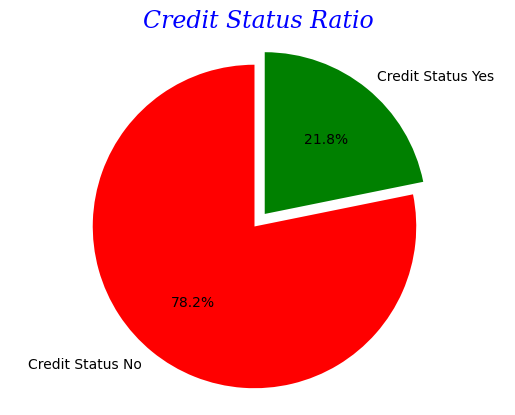

In [427]:
#📊Let's look at distribution of values
binary_ratio = df['Credit_Status'].mean()

# Visualize the ratio
labels = ['Credit Status No', 'Credit Status Yes']
sizes = [1 - binary_ratio, binary_ratio]
colors = ['red','green']
explode = (0, 0.1)

y = {'color':'b','fontfamily' : 'serif','fontstyle':'italic','fontsize': 17}
plt.pie(sizes, explode=explode, labels=labels , colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Credit Status Ratio',fontdict = y)
plt.show()

In [321]:
#Let's find correlations between columns
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_21732\2097604800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,salary,employment_time,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Credit_History_Length
age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
salary,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
employment_time,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
Credit_Amount,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
Credit_Status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percentage,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
Credit_History_Length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [521]:
#Let's examine impact of others columns to targer column
positive = {}
negative = {}
for i in df.corr()['Credit_Status'].index:
    correlation = round(df.corr()['Credit_Status'][i],3)
    if correlation > 0:
        positive[i] = correlation
    else:
        negative[i] = correlation

print("·Impacts")        
print('           Positive: ')
for i,y in positive.items():
    print(f"{i}:{y}")
print('\n           Negative: ')
for i,y in negative.items():
    print(f"{i}:{y}")

·Impacts
           Positive: 
Credit_Amount:0.105
loan_rate:0.335
Credit_Status:1.0
loan_percentage:0.379

           Negative: 
age:-0.022
salary:-0.144
employment_time:-0.082
Credit_History_Length:-0.016


C:\Users\HP\AppData\Local\Temp\ipykernel_21732\1785748482.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in df.corr()['Credit_Status'].index:
C:\Users\HP\AppData\Local\Temp\ipykernel_21732\1785748482.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = round(df.corr()['Credit_Status'][i],3)


C:\Users\HP\AppData\Local\Temp\ipykernel_21732\1198399877.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Credit_Status'].values.reshape(-1, 1)


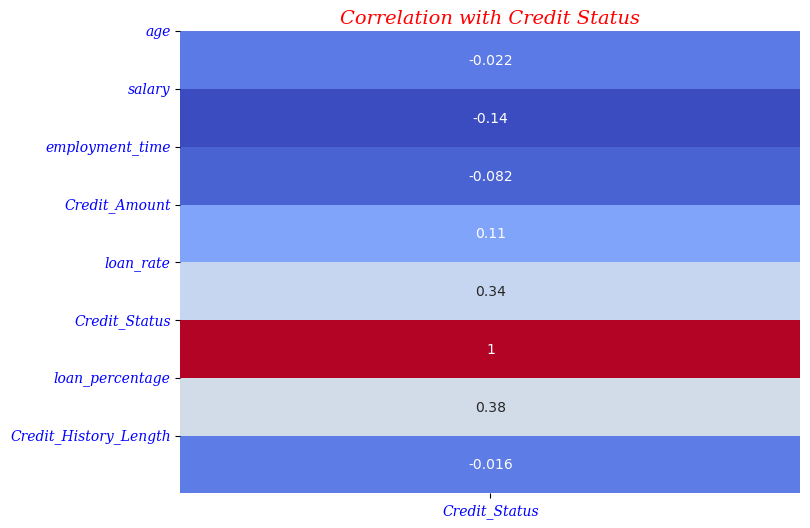

In [522]:
#📊Let's examine business success criterias

correlation = df.corr()['Credit_Status'].values.reshape(-1, 1)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)

y = {'color':'red','fontfamily' : 'serif','fontstyle':'italic','fontsize': 14}
plt.title('Correlation with Credit Status',fontdict = y)
x = {'color':'b','fontfamily' : 'serif','fontstyle':'italic','fontsize': 10}
plt.xticks(ticks=[0.5], labels=['Credit_Status'],fontdict = x)
plt.yticks(ticks=[0, 1, 2,3,4,5,6,7],fontdict = x, labels=['age','salary','employment_time','Credit_Amount','loan_rate','Credit_Status','loan_percentage','Credit_History_Length'], rotation=0)
plt.show()

In [523]:
#Data mining success criteria
#I think if we increase the positive influencing features, Credit status increases 

#Credit_Amount
#loan_rate
#Credit_Status
#loan_percentage 

#I think if we decrease the negative influencing features, Credit status increases 

#age
#salary
#employment_time
#Credit_History_Length

# 📍 DATA UNDERSTANDING

In [460]:
#Let's get to know the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
salary,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
employment_time,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
Credit_Amount,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
Credit_Status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percentage,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
Credit_History_Length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [379]:
#Let's look at column features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    32581 non-null  int64  
 1   salary                 32581 non-null  int64  
 2   home_ownership         32581 non-null  object 
 3   employment_time        31686 non-null  float64
 4   loan_purposes          32581 non-null  object 
 5   credit_score           32581 non-null  object 
 6   Credit_Amount          32581 non-null  int64  
 7   loan_rate              29465 non-null  float64
 8   Credit_Status          32581 non-null  int64  
 9   loan_percentage        32581 non-null  float64
 10  Payment_History        32581 non-null  object 
 11  Credit_History_Length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Text(0, 0.5, 'Null Value Count')

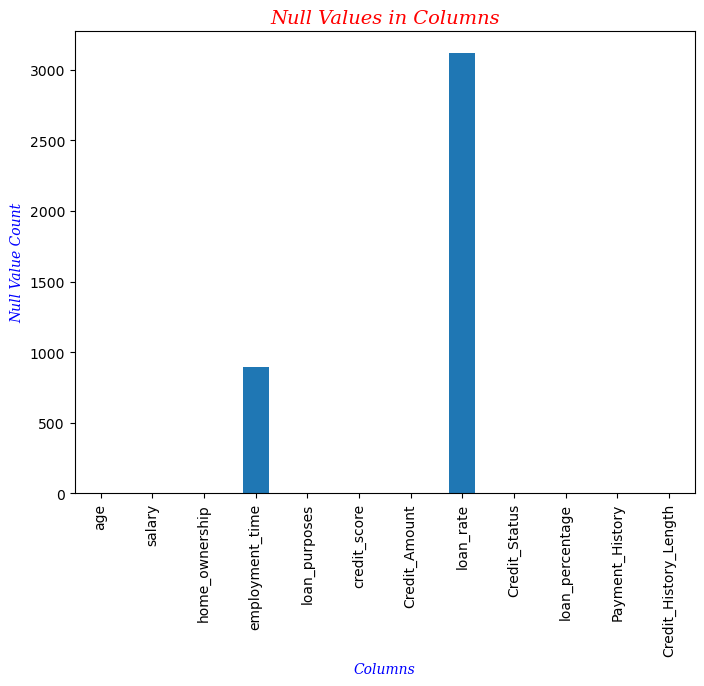

In [556]:
#📊Let's calculate the count of null values for each column
null_counts = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
null_counts.plot(kind='bar')
plt.title('Null Values in Columns',fontdict = y)
plt.xlabel('Columns',fontdict = x)
plt.ylabel('Null Value Count',fontdict = x)

In [380]:
#Let's look at null values count
df.isnull().sum()

age                         0
salary                      0
home_ownership              0
employment_time           895
loan_purposes               0
credit_score                0
Credit_Amount               0
loan_rate                3116
Credit_Status               0
loan_percentage             0
Payment_History             0
Credit_History_Length       0
dtype: int64

In [381]:
#Let's look at number of unique values by columns
df.nunique()

age                        58
salary                   4295
home_ownership              4
employment_time            36
loan_purposes               6
credit_score                7
Credit_Amount             753
loan_rate                 348
Credit_Status               2
loan_percentage            77
Payment_History             2
Credit_History_Length      29
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_21732\3745204271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

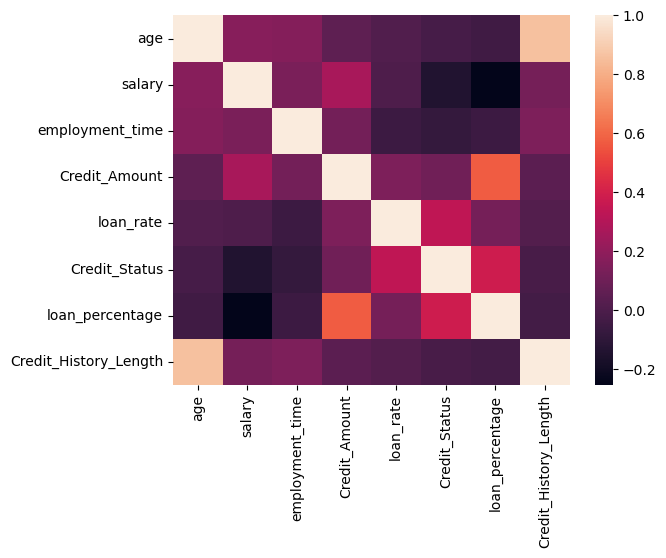

In [563]:
#📊Let's display in heatmap chart
sns.heatmap(df.corr())

# 📍 Data Preparation

In [550]:
#Relationships between pairs or small numbers of attributes
#Let's examine that if we sum features then how change correlation
#Before get dumies

for column1 in df.select_dtypes(int).columns:
    for column2 in df.select_dtypes(int).columns:
        if column1 > column2 and column1 != 'Credit_Status' and column2 != 'Credit_Status':
            a = df[column1] + df[column2]
            b = df['Credit_Status'].corr(a)
            if b > 0.1 or b < -0.1:
                print(f" \"{column1}\" - \"{column2}\"  : {b} ")

 "age" - "Credit_Amount"  : 0.10534853309774514 
 "salary" - "age"  : -0.14444914035009987 
 "salary" - "Credit_Amount"  : -0.12956733106593837 
 "salary" - "Credit_History_Length"  : -0.1444493888997413 
 "Credit_History_Length" - "Credit_Amount"  : 0.10536285831125869 


In [323]:
#Let's represent yes no types with 0 1
df['Payment_History'] = df['Payment_History'].map({'Y':1,'N':0})

In [324]:
#Let's use dummies for encoding
df = pd.get_dummies(df , columns = ['home_ownership','loan_purposes'])

In [325]:
#Let's encode credit score column with Label encoding
label_enco = LabelEncoder()
df['credit_score'] = label_enco.fit_transform(df['credit_score'])
#When data type is nominal then we use get dummies or one hot encoding , but when data type is ordinal then we use label encoder

In [326]:
#Let's look at the ratio of credit status values
df['Credit_Status'].value_counts()

0    25473
1     7108
Name: Credit_Status, dtype: int64

In [327]:
#Let's delete columns according to a certain law
#Let's look at correlations between columns
#The highest --> 0.859133 between Credit_History_Length and Age 
#We must remove one of them for to prevent multicolenarity
df.drop('age' , axis = 1,inplace = True)

In [328]:
#Let's fill null values with mean
df['employment_time'].fillna(df['employment_time'].mean(),inplace = True)
df['loan_rate'].fillna(df['loan_rate'].mean(),inplace = True)

In [329]:
#Let's normalize values
scaler_val = MinMaxScaler()
columns_to_scale = ['salary', 'Credit_Amount']
df[columns_to_scale] = scaler_val.fit_transform(df[columns_to_scale])

In [330]:
#Let's examine outliers values
#Let's use 3 z-score method

for i in ['salary','employment_time','Credit_Amount']:
        below_outlier = df[i].mean() - 3* df[i].std()
        above_outlier = df[i].mean() + 3* df[i].std()
        df = df[(df[i]>= below_outlier) & (df[i] <= above_outlier)]

In [331]:
#Let's shuffle the dataset
df.sample(frac = 1.0)

,salary,employment_time,credit_score,Credit_Amount,loan_rate,Credit_Status,loan_percentage,Payment_History,Credit_History_Length,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_purposes_DEBTCONSOLIDATION,loan_purposes_EDUCATION,loan_purposes_HOMEIMPROVEMENT,loan_purposes_MEDICAL,loan_purposes_PERSONAL,loan_purposes_VENTURE
2112,0.004169,4.0,1,0.057971,10.990000,0,0.09,0,3,0,0,0,1,0,0,0,0,1,0
24051,0.012239,4.0,0,0.356522,11.011695,0,0.17,0,4,0,0,0,1,0,0,0,1,0,0
6185,0.003175,0.0,0,0.420290,8.940000,0,0.65,0,2,0,0,1,0,0,1,0,0,0,0
3394,0.006338,0.0,3,0.159420,16.770000,0,0.14,0,3,1,0,0,0,0,0,0,0,1,0
8697,0.018729,6.0,3,0.130435,14.960000,0,0.04,1,4,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29636,0.007058,6.0,3,0.420290,12.860000,1,0.32,1,4,1,0,0,0,1,0,0,0,0,0
22873,0.017678,0.0,1,0.188406,10.590000,0,0.06,0,2,1,0,0,0,0,0,0,0,0,1
12493,0.005170,5.0,0,0.101449,7.290000,0,0.11,0,2,0,0,1,0,0,0,0,0,0,1
29737,0.011448,3.0,0,0.156522,7.490000,1,0.08,0,3,1,0,0,0,0,0,0,0,1,0


In [332]:
#Let's examine that can we increase current corralations 
target = 'Credit_Status'
index = 0
for c1 in df: # 20
    for c2 in df: # 20
        if c1 > c2 and c1 != target and c2 != target:
            index += 1
            df['TEMP' + str(index)] = df[c1] + df[c2]
            
            c1c = abs(df[c1].corr(df[target]))
            c2c = abs(df[c2].corr(df[target]))
            combined = abs(df['TEMP' + str(index)].corr(df[target]))

            # FILTERING
            #if __singleValid__( c1c, combined, 0.05, 1.10, 0.20):
                
            if combined > c1c + 0.05 and combined > c2c + 0.05: 
                print( c1, c2, combined, c1c, c2c )
            else:
                del df['TEMP' + str(index)]


home_ownership_OWN home_ownership_MORTGAGE 0.23874360976985967 0.10087692283460194 0.18760463215960665
home_ownership_RENT Payment_History 0.2878092718358029 0.23711762745965292 0.1780701126354708


In [333]:
#Let's change name of columns
#Let's remove 'TEMP 69' because this column gives the combined columns we separate with get dummies
df.rename(columns = {'TEMP74':'home.own+pay.hist'} , inplace = True)
df.drop('TEMP69',axis = 1,  inplace  = True)

In [558]:
#Let's create a target and an explanations
#Let's rationale for inclusion/exclusion
#Our purpose is to predict Credit status values and Others is explanatory if its is meaningful
y = df['Credit_Status']
X = df.drop('Credit_Status',axis = 1)

In [335]:
#Let's split data
train_x_val,test_x,train_y_val,test_y = train_test_split(X,y , test_size = 0.2 ,random_state = 42,stratify = y)
train_x , val_x , train_y, val_y = train_test_split(train_x_val , train_y_val , train_size = 0.8 , random_state = 42 , stratify = train_y_val)

# 📍 MODELLING

In [557]:
#Let's create Desicion Tree model 
dtree = DecisionTreeClassifier()
dtree = dtree.fit(train_x,train_y)

In [337]:
#Let's predict test_x
pred_y = dtree.predict(test_x)

In [338]:
#Let's find accuracy and f1 score
accuracy = accuracy_score(test_y, pred_y)
print("·Accuracy:", accuracy)
f1_score_value = f1_score(test_y, pred_y)
print("·F1 score:", f1_score_value)

·Accuracy: 0.8818411894969946
·F1 score: 0.7333095323098893


In [339]:
#Let's check for validation set
pred_val = dtree.predict(val_x) 

In [340]:
#Let's find accuracy and f1 score
accuracy = accuracy_score(val_y, pred_val)
print("·Accuracy:", accuracy)
f1_score_value = f1_score(val_y, pred_val)
print("·F1 score:", f1_score_value)

·Accuracy: 0.891459074733096
·F1 score: 0.7552385198395006


## 📍 Evaluation: 
  Accuracy and f1 scores for test and validation data are close to each other.

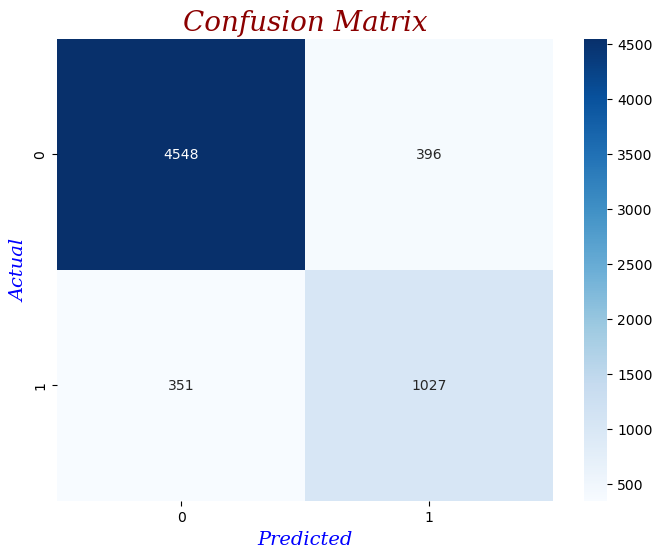

In [562]:
#📊Let's create confusion matrix
cm = confusion_matrix(test_y, pred_y)
plt.figure(figsize=(8, 6))
fontx = {'color' : 'b', 'fontsize' : 14 , 'fontfamily': 'serif','fontstyle' : 'italic'}
fonty = {'color' : 'darkred', 'fontsize' : 20 , 'fontfamily': 'serif','fontstyle' : 'italic'}
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted",fontdict = fontx)
plt.ylabel("Actual",fontdict = fontx)
plt.title("Confusion Matrix", fontdict = fonty)
plt.show()

In [ ]:
#Average , we predict correctly 89 out of every 100 samples
#This may or may not be satisfactory depending on the situation

In [365]:
#Let's calculate accuracy score as manual
print('·Accuracy Score: ', (4548+1027)/(4548+1027+351+396))
print('Number of measurements: ')
print('·Correct: ',1027+4548)
print('·TP: ',1027)
print('·TN: ',4548)
print('·FP: ',396)
print('·FN: ',351)

·Accuracy Score:  0.8818411894969946
Number of measurements: 
·Correct:  5575
·TP:  1027
·TN:  4548
·FP:  396
·FN:  351


# 🔎 Errors

In [366]:
#Let's find mean squaered error
#We want the mean squared error to be a minimum
from sklearn.metrics import mean_squared_error

In [369]:
print("·Mean squared error: " , mean_squared_error(test_y,pred_y))

·Mean squared error:  0.11815881050300538


In [373]:
#Let's find mean absolute error
#We want the mean squared error to be a minimum
#The result is equal to the result of the root mean square error, since our target values are 0 and 1, and its square is equal to its own value
from sklearn.metrics import mean_absolute_error

In [374]:
print("·Mean absolute error: " ,mean_absolute_error(test_y,pred_y))

·Mean absolute error:  0.11815881050300538


# 📌 The End